<a href="https://colab.research.google.com/github/fatihdzaki01/GelarRasa_ML/blob/Lolo-Enak-Banget-Crot-Banyak/DSC2025_doaibu_Fatih_Dzaki_Nabhani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPLORATORY DATA**

Pengecekan null, duplikasi data, outlier, dll

In [4]:
#Lakukan Import Library yang kita butuhkan.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import plotly.graph_objects as go

In [5]:
sales_df = pd.read_csv('/content/sales.csv')
reviews_df = pd.read_csv('/content/reviews.csv')
products_df = pd.read_csv('/content/products.csv')
marketing_df = pd.read_csv('/content/marketing.csv')

In [ ]:
#Terus tih ena enak
sales_null = sales_df.isna().sum()
reviews_null = reviews_df.isna().sum()
products_null = products_df.isna().sum()
marketing_null = marketing_df.isna().sum()

all_of_null = pd.concat([sales_null,
                          reviews_null,
                          products_null,
                          marketing_null], axis=1)
print(all_of_null)

                     0    1    2    3
transaction_id     0.0  NaN  NaN  NaN
date               0.0  0.0  NaN  NaN
product_id         0.0  0.0  0.0  0.0
region             0.0  NaN  NaN  NaN
channel            0.0  NaN  NaN  0.0
units_sold         0.0  NaN  NaN  NaN
avg_price          0.0  NaN  NaN  NaN
discount_pct       0.0  NaN  NaN  NaN
revenue            0.0  NaN  NaN  NaN
days_since_launch  0.0  NaN  NaN  NaN
review_id          NaN  0.0  NaN  NaN
rating             NaN  0.0  NaN  NaN
sentiment          NaN  0.0  NaN  NaN
platform           NaN  0.0  NaN  NaN
comment            NaN  0.0  NaN  NaN
product_name       NaN  NaN  0.0  NaN
brand              NaN  NaN  0.0  NaN
type               NaN  NaN  0.0  NaN
size_ml            NaN  NaN  0.0  NaN
base_price         NaN  NaN  0.0  NaN
launch_date        NaN  NaN  0.0  NaN
campaign_id        NaN  NaN  NaN  0.0
campaign_name      NaN  NaN  NaN  0.0
start_date         NaN  NaN  NaN  0.0
end_date           NaN  NaN  NaN  0.0
spend_idr   

In [ ]:
sales_df[sales_df.drop(columns=['transaction_id']).isna().all(axis=1)]

In [ ]:
sales_df = sales_df[~sales_df.drop(columns=['transaction_id']).isna().all(axis=1)]


In [ ]:
#CEK DUPLICATE SETIAP DATAFRAME-------------------------------------------------
sales_dup = sales_df.duplicated().sum()
reviews_dup = reviews_df.duplicated().sum()
products_dup = products_df.duplicated().sum()
marketing_dup = marketing_df.duplicated().sum()

all_of_dup = pd.DataFrame({
    'sales_df': [sales_dup],
    'reviews_df': [reviews_dup],
    'products_df': [products_dup],
    'marketing_df': [marketing_dup]
})

print(all_of_dup)

   sales_df  reviews_df  products_df  marketing_df
0         0           0            0             0


In [ ]:
#CEK TIPE DATA SETIAP DATAFRAME-------------------------------------------------
dfs = [sales_df, reviews_df, products_df, marketing_df]
names = ['sales_df', 'reviews_df', 'products_df', 'marketing_df']

for df, name in zip(dfs, names):
    print(f"=== {name} ===")
    print(df.dtypes)
    print("\n")

In [ ]:
# memperbaiki tipe data dari kolom date menjadi tipe data date

# ubah tipe data date 'object' menjadi 'date' pada tabel sales
sales_df['date'] = pd.to_datetime(sales_df['date'])

# ubah tipe data date 'object' menjadi 'date' pada tabel reviews
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

# ubah tipe data launch_date 'object' menjadi 'date' pada tabel products_df
products_df['launch_date'] = pd.to_datetime(products_df['launch_date'])

# ubah tipe data startdate 'object' menjadi 'date' pada tabel marketing_df
marketing_df['start_date'] = pd.to_datetime(marketing_df['start_date'])

# ubah tipe data enddate 'object' menjadi 'date' pada tabel marketing_df
marketing_df['end_date'] = pd.to_datetime(marketing_df['end_date'])

In [ ]:
# cek tipe data setelah pengubahan
dfs = [sales_df, reviews_df, products_df, marketing_df]
names = ['sales_df', 'reviews_df', 'products_df', 'marketing_df']

for df, name in zip(dfs, names):
    print(f"=== {name} ===")
    print(df.dtypes)
    print("\n")

In [ ]:
# describe sales_df
sales_df[['units_sold', 'avg_price', 'discount_pct', 'revenue']].describe()

,units_sold,avg_price,discount_pct,revenue
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,4.001974,30315.081419,5.006720,121309.698437
std,1.731468,5960.625567,6.125581,58534.346512
min,1.000000,13248.420000,0.000000,13248.420000
25%,3.000000,26771.820000,0.000000,77720.817500
50%,4.000000,30780.940000,5.000000,113075.435000
75%,5.000000,34268.410000,10.000000,156348.607500
max,15.000000,44099.840000,20.000000,569920.150000


In [ ]:
#describe review_df
reviews_df[['rating']].describe()

,rating
count,10000.000000
mean,2.989770
std,1.154366
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [ ]:
# describe product_df
products_df[['base_price']].describe()


,base_price
count,15.00000
mean,32400.00000
std,6080.41352
min,18000.00000
25%,29000.00000
50%,33000.00000
75%,35500.00000
max,42000.00000


In [ ]:
# describe marketing_df
marketing_df[['engagement_rate', 'spend_idr']].describe()

,engagement_rate,spend_idr
count,20.000000,2.000000e+01
mean,0.295650,7.466626e+08
std,0.175868,2.959522e+08
min,0.086000,2.564116e+08
25%,0.148750,5.326261e+08
50%,0.225500,7.380224e+08
75%,0.438250,1.011027e+09
max,0.586000,1.180332e+09


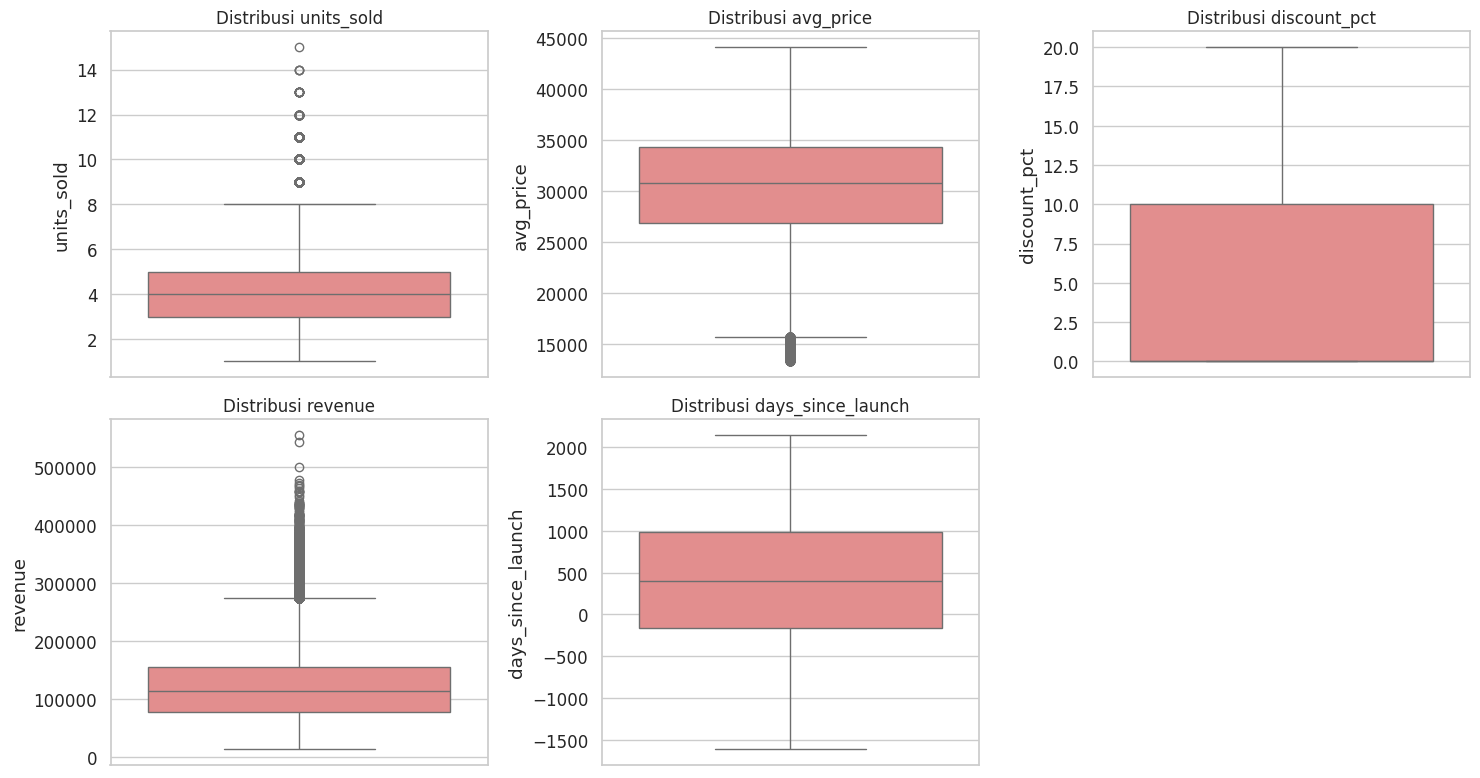

In [ ]:
#VISUALISASI BOX PLOT - SALES DF

numeric_cols = ['units_sold', 'avg_price', 'discount_pct', 'revenue', 'days_since_launch']
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=sales_df[col], color='lightcoral')  # ubah ke y untuk vertikal
    plt.title(f'Distribusi {col}', fontsize=12)
    plt.ylabel(col)

plt.tight_layout()
plt.show()


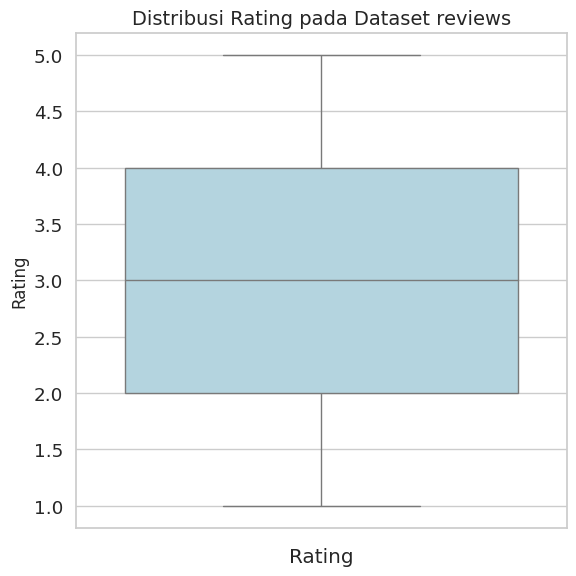

In [ ]:
#VISUALISASI BOXPLOT - REVIEW DF
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

plt.figure(figsize=(6, 6))
sns.boxplot(y=reviews_df['rating'], color='lightblue')
plt.title('Distribusi Rating pada Dataset reviews', fontsize=14)
plt.ylabel('Rating', fontsize=12)
plt.xlabel('Rating')
plt.tight_layout()
plt.show()


Kolom numerik: ['size_ml', 'base_price']


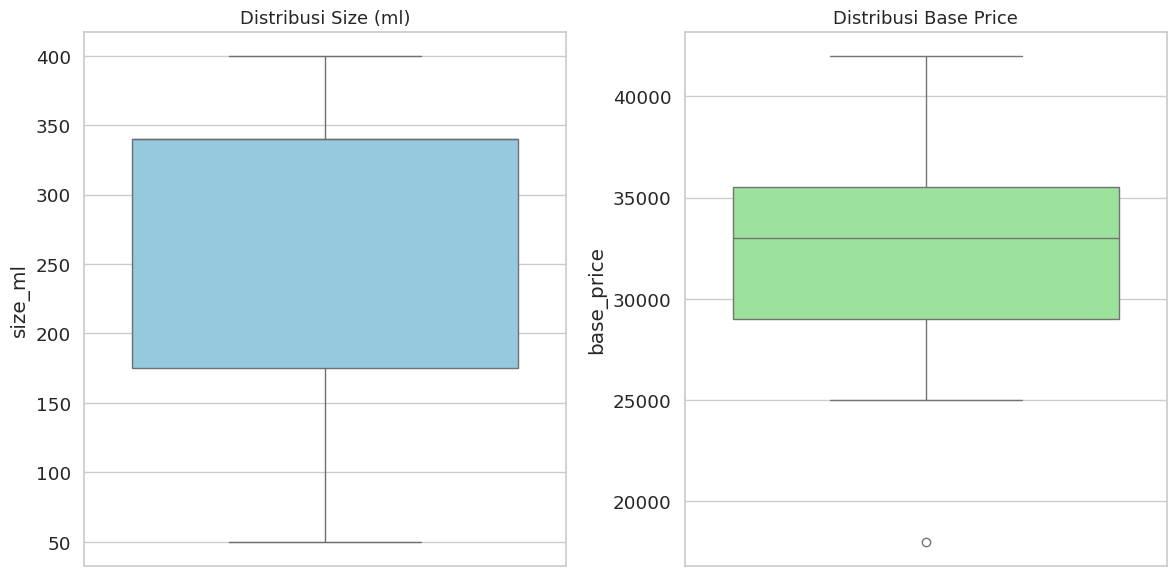

In [ ]:
#VISUALISASI BOXPLOT - PRODUCT DF
numeric_cols = products_df.select_dtypes(include=['int64', 'float64']).columns
print("Kolom numerik:", list(numeric_cols))
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=products_df['size_ml'], color='skyblue')
plt.title('Distribusi Size (ml)', fontsize=13)
plt.ylabel('size_ml')
plt.subplot(1, 2, 2)
sns.boxplot(y=products_df['base_price'], color='lightgreen')
plt.title('Distribusi Base Price', fontsize=13)
plt.ylabel('base_price')

plt.tight_layout()
plt.show()


Kolom numerik: ['spend_idr', 'engagement_rate']


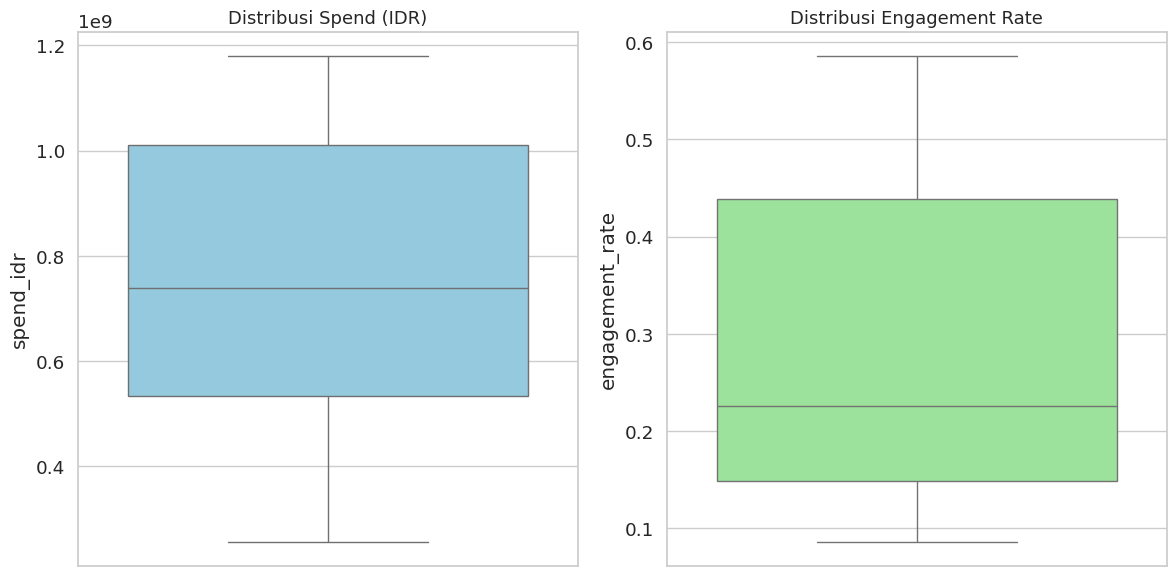

In [ ]:
numeric_cols = marketing_df.select_dtypes(include=['int64', 'float64']).columns
print("Kolom numerik:", list(numeric_cols))

sns.set(style="whitegrid", palette="muted", font_scale=1.2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=marketing_df['spend_idr'], color='skyblue')
plt.title('Distribusi Spend (IDR)', fontsize=13)
plt.ylabel('spend_idr')
plt.subplot(1, 2, 2)
sns.boxplot(y=marketing_df['engagement_rate'], color='lightgreen')
plt.title('Distribusi Engagement Rate', fontsize=13)
plt.ylabel('engagement_rate')
plt.tight_layout()
plt.show()


In [ ]:
####### VIF - CEK MULTIKOLINEARITAS - sales df
# --- Import library ---
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# --- Pilih variabel independen numerik ---
X = sales_df[['units_sold', 'avg_price', 'discount_pct', 'days_since_launch']]

# --- Tambahkan konstanta (intercept) ---
X_const = add_constant(X)

# --- Hitung nilai VIF ---
vifdata = pd.DataFrame()
vifdata["Variable"] = X_const.columns
vifdata["VIF"] = [variance_inflation_factor(X_const.values, i)
              for i in range(X_const.shape[1])]

# --- Tampilkan hasil ---
print("=== Hasil Uji Multikolinearitas (VIF) ===")
print(vifdata)


=== Hasil Uji Multikolinearitas (VIF) ===
            Variable        VIF
0              const  43.306938
1         units_sold   1.000004
2          avg_price   1.200490
3       discount_pct   1.129908
4  days_since_launch   1.070463


In [ ]:
####### VIF - CEK MULTIKOLINEARITAS - product df
numeric_cols = ['size_ml', 'base_price']
X = products_df[numeric_cols].dropna()

X_const = add_constant(X)

vifdata2 = pd.DataFrame()
vifdata2["Variable"] = X_const.columns
vifdata2["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

print("=== Hasil Uji Multikolinearitas (VIF) pada products_df ===")
print(vifdata2)


=== Hasil Uji Multikolinearitas (VIF) pada products_df ===
     Variable        VIF
0       const  31.713084
1     size_ml   1.275308
2  base_price   1.275308


In [ ]:
####### VIF - CEK MULTIKOLINEARITAS - marketing df
# --- Pilih variabel numerik ---
numeric_cols = ['spend_idr', 'engagement_rate']
X = marketing_df[numeric_cols].dropna()

# --- Tambahkan konstanta (intercept) ---
X_const = add_constant(X)

# --- Hitung nilai VIF ---
vifdata3 = pd.DataFrame()
vifdata3["Variable"] = X_const.columns
vifdata3["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

# --- Tampilkan hasil ---
print("=== Hasil Uji Multikolinearitas (VIF) pada marketing_df ===")
print(vifdata3)


=== Hasil Uji Multikolinearitas (VIF) pada marketing_df ===
          Variable        VIF
0            const  13.015162
1        spend_idr   1.044026
2  engagement_rate   1.044026



=== SALES ===
Numerik: ['units_sold', 'avg_price', 'discount_pct', 'revenue', 'days_since_launch']
Kategorikal: ['transaction_id', 'product_id', 'region', 'channel']


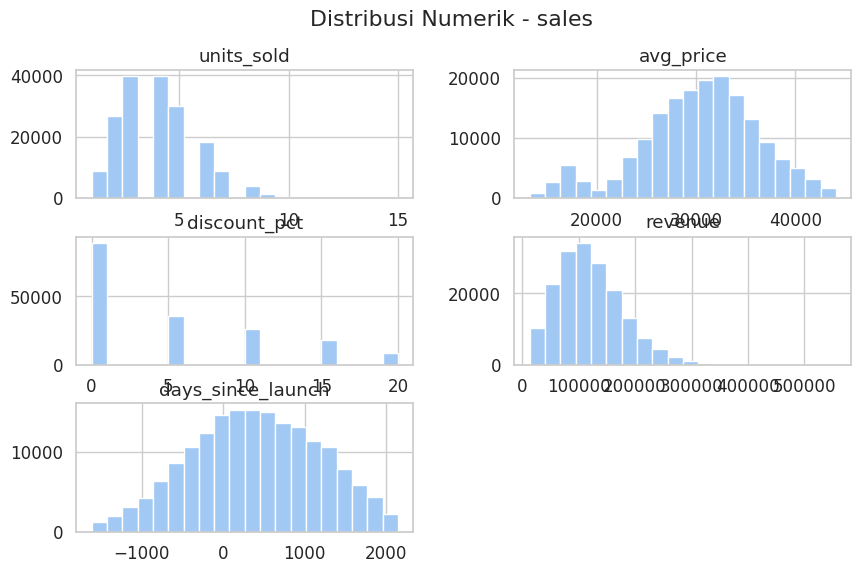


=== REVIEWS ===
Numerik: ['rating']
Kategorikal: ['review_id', 'product_id', 'sentiment', 'platform', 'comment']


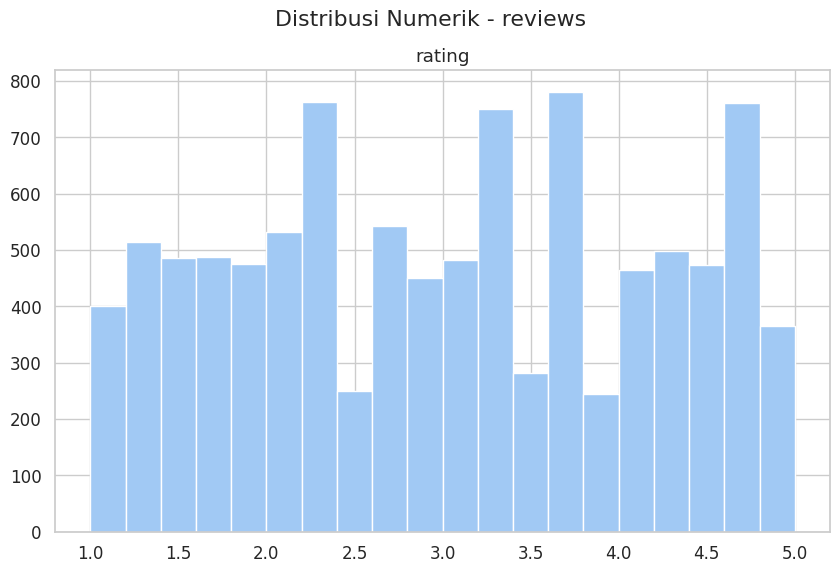


=== MARKETING ===
Numerik: ['spend_idr', 'engagement_rate']
Kategorikal: ['campaign_id', 'product_id', 'campaign_name', 'channel']


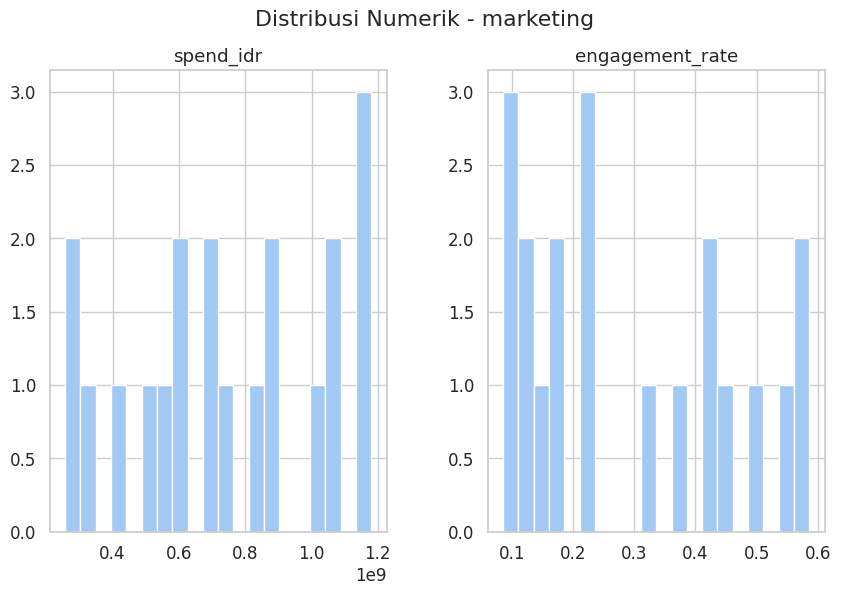


=== PRODUCTS ===
Numerik: ['size_ml', 'base_price']
Kategorikal: ['product_id', 'product_name', 'brand', 'type']


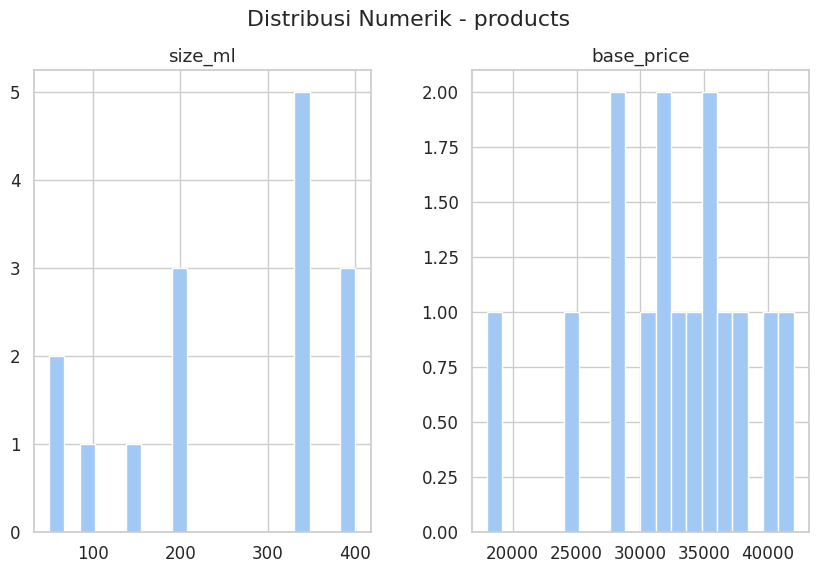

In [ ]:
datasets = {
    'sales': sales_df,
    'reviews': reviews_df,
    'marketing': marketing_df,
    'products': products_df
}

for name, df in datasets.items():
    print(f"\n=== {name.upper()} ===")
    num_cols = df.select_dtypes(include=['int64','float64']).columns
    cat_cols = df.select_dtypes(include=['object']).columns

    print("Numerik:", list(num_cols))
    print("Kategorikal:", list(cat_cols))

    # Plot distribusi numerik
    if len(num_cols) > 0:
        df[num_cols].hist(bins=20, figsize=(10, 6))
        plt.suptitle(f"Distribusi Numerik - {name}")
        plt.show()


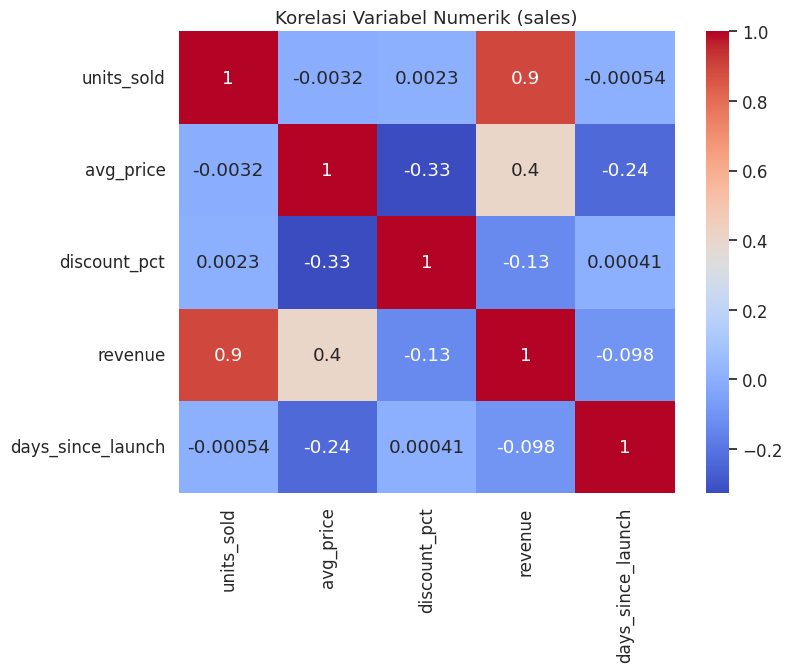

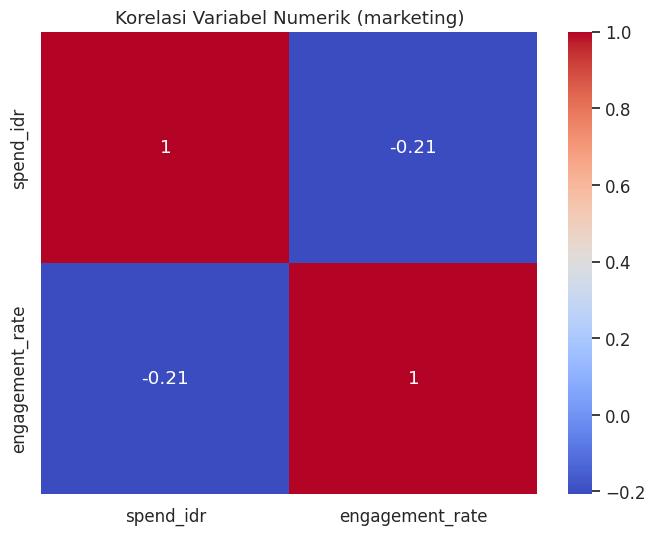

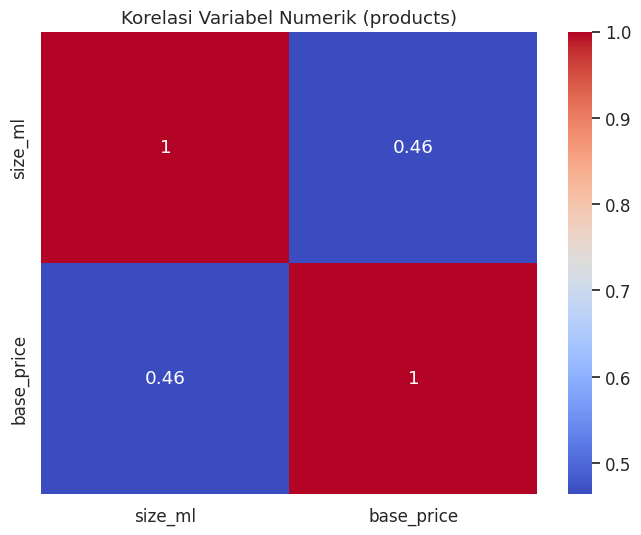

In [ ]:
for name, df in datasets.items():
    num_df = df.select_dtypes(include=['int64','float64'])
    if num_df.shape[1] > 1:
        plt.figure(figsize=(8,6))
        sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
        plt.title(f'Korelasi Variabel Numerik ({name})')
        plt.show()


In [10]:


# --- CLEAN BASIC (product_id types + brand presence) ---
for df in [products_df, reviews_df, marketing_df, sales_df]:
    if "product_id" in df.columns:
        df["product_id"] = df["product_id"].astype(str).str.strip()

# Ensure brand column exists in products
if "brand" not in products_df.columns:
    # try common alternatives
    alt = [c for c in products_df.columns if "brand" in c.lower() or "merk" in c.lower()]
    if alt:
        products_df = products_df.rename(columns={alt[0]: "brand"})
    else:
        # fallback: use prefix of product name or "Global"
        if "product_name" in products_df.columns:
            products_df["brand"] = products_df["product_name"].astype(str).str.split().str[0]
        else:
            products_df["brand"] = "Global"

products_df["brand"] = products_df["brand"].astype(str).str.strip().replace("", "Global")

# --- AGGREGATE PER PRODUCT (so we can compute robust global metrics) ---
# Reviews per product
rev_sum = reviews_df.groupby("product_id").agg(
    avg_rating=("rating", "mean"),
    positive_ratio=("sentiment", lambda s: (s == "Positive").mean() if s.dtype == 'O' else (s > 3).mean()),
    total_reviews=("review_id", "count")
).reset_index()

# Marketing per product
mkt_sum = marketing_df.groupby("product_id").agg(
    avg_engagement=("engagement_rate", "mean"),
    total_spend=("spend_idr", "sum")
).reset_index()

# Sales per product (robust handling)
if "amount" in sales_df.columns:
    sales_sum = sales_df.groupby("product_id").agg(total_sales=("amount", "sum")).reset_index()
elif "quantity" in sales_df.columns and "price" in sales_df.columns:
    sales_sum = sales_df.groupby("product_id").apply(lambda g: (g["quantity"]*g["price"]).sum()).reset_index(name="total_sales")
elif "quantity" in sales_df.columns:
    sales_sum = sales_df.groupby("product_id").agg(total_sales=("quantity", "sum")).reset_index()
else:
    key_for_count = "transaction_id" if "transaction_id" in sales_df.columns else sales_df.columns[0]
    sales_sum = sales_df.groupby("product_id").agg(total_sales=(key_for_count, "count")).reset_index()


# Merge all to products
prod = products_df.merge(rev_sum, on="product_id", how="left") \
                  .merge(mkt_sum, on="product_id", how="left") \
                  .merge(sales_sum, on="product_id", how="left")

# fill NaN
for c in ["avg_rating","positive_ratio","total_reviews","avg_engagement","total_spend","total_sales"]:
    if c in prod.columns:
        prod[c] = prod[c].fillna(0)

# --- GLOBAL METRICS CALCULATION ---
# CX: rata-rata rating (0-5) dan rasio positif digabung (0-1)
mean_rating = prod["avg_rating"].replace(0, np.nan).mean()
mean_rating = 0.0 if np.isnan(mean_rating) else mean_rating
cx_global = (mean_rating / 5.0 + prod["positive_ratio"].replace(0, np.nan).mean()) / 2.0
cx_global = 0.0 if np.isnan(cx_global) else float(cx_global)


# Marketing: weighted avg engagement by spend if spend exists, else simple mean (assume engagement 0-1)
if prod["total_spend"].sum() > 0:
    marketing_global = float((prod["avg_engagement"] * prod["total_spend"]).sum() / prod["total_spend"].sum())
else:
    marketing_global = float(prod["avg_engagement"].mean())

# Performance: how products perform on average relative to max score (use mean_rating / 5)
performance_global = float(mean_rating / 5.0) if mean_rating>0 else 0.0

# Brand Strength: combine total reviews and total sales into 0-1 scale
total_reviews = prod["total_reviews"].sum()
total_sales = prod["total_sales"].sum()


# Normalizers: pick soft caps to squash huge numbers
rev_norm = total_reviews / (total_reviews + 1000)   # ~0.5 at 1000 reviews total
sales_norm = total_sales / (total_sales + 100000)  # ~0.5 at 100k sales amount/units
brand_strength_global = float((rev_norm + sales_norm) / 2.0)

# --- PUT METRICS INTO A DICT & PLOT RADAR ---
metrics = {
    "CX": round(cx_global, 4),
    "Marketing": round(marketing_global, 4),
    "Performance": round(performance_global, 4),
    "Brand_Strength": round(brand_strength_global, 4)
}

# Radar plotting (Plotly)
categories = list(metrics.keys())
values = list(metrics.values())
# close the loop
values_loop = values + values[:1]
theta = categories + categories[:1]

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r=values_loop,
    theta=theta,
    fill='toself',
    name='Global'
))
fig.update_layout(
    title="Global Innovation Radar (semua produk)",
    polar=dict(radialaxis=dict(visible=True, range=[0,1])),
    showlegend=True,
    width=700, height=600
)
fig.show()

# --- PRINT NUMERIC SUMMARY (simpel) ---
print("Global metrics (0-1 scale):")
for k,v in metrics.items():
    print(f"- {k}: {v}")

Global metrics (0-1 scale):
- CX: 0.4271
- Marketing: 0.2943
- Performance: 0.598
- Brand_Strength: 0.7222


/tmp/ipython-input-218661484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['date'] = pd.to_datetime(sales_df['date'])
/tmp/ipython-input-218661484.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = sales_df.groupby(pd.Grouper(key='date', freq='M')).agg({'revenue': 'sum'}).reset_index()


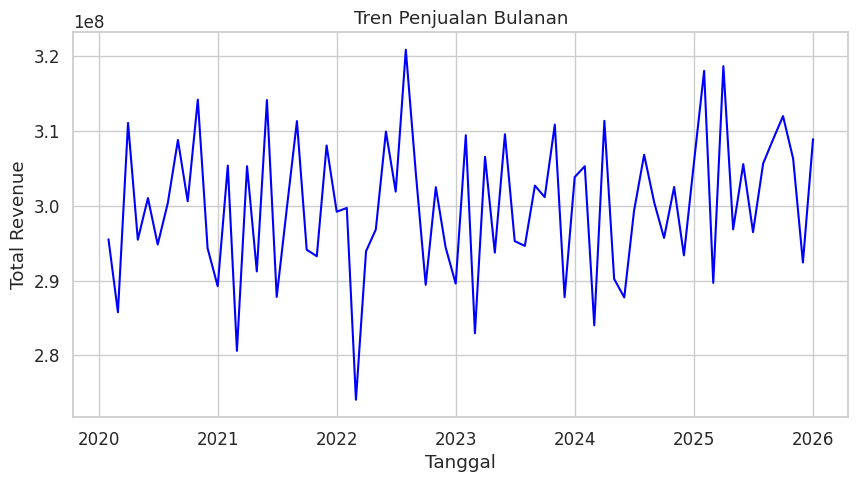

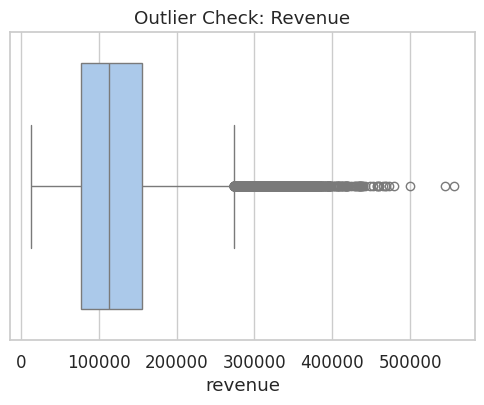

In [ ]:
if 'date' in sales_df.columns:
    sales_df['date'] = pd.to_datetime(sales_df['date'])
    monthly = sales_df.groupby(pd.Grouper(key='date', freq='M')).agg({'revenue': 'sum'}).reset_index()

    plt.figure(figsize=(10,5))
    sns.lineplot(data=monthly, x='date', y='revenue', color='blue')
    plt.title('Tren Penjualan Bulanan')
    plt.xlabel('Tanggal')
    plt.ylabel('Total Revenue')
    plt.show()

# Boxplot outlier revenue
if 'revenue' in sales_df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=sales_df['revenue'])
    plt.title('Outlier Check: Revenue')
    plt.show()


/tmp/ipython-input-2465460428.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_revenue.values, y=top_revenue.index, palette='cool')


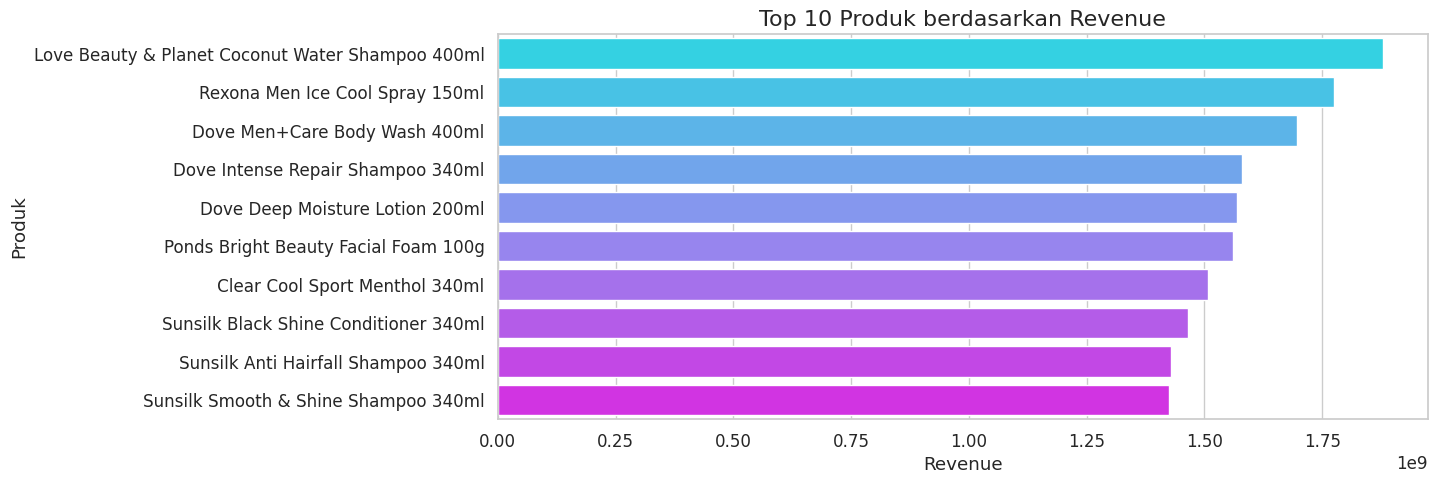

/tmp/ipython-input-2465460428.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_units.values, y=top_units.index, palette='viridis')


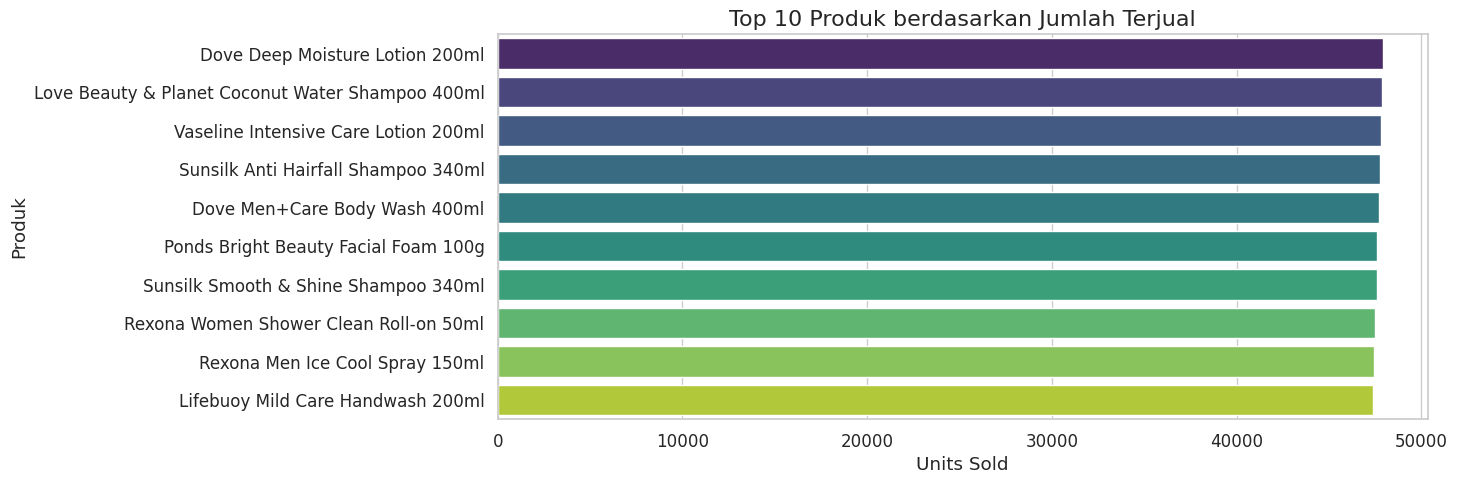

In [ ]:
# Gabung dengan products
sales_products = sales_df.merge(products_df, on='product_id', how='left')

# Top produk by revenue
top_revenue = sales_products.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(10)
top_units = sales_products.groupby('product_name')['units_sold'].sum().sort_values(ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(12,5))
sns.barplot(x=top_revenue.values, y=top_revenue.index, palette='cool')
plt.title('Top 10 Produk berdasarkan Revenue', fontsize=16)
plt.xlabel('Revenue')
plt.ylabel('Produk')
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(x=top_units.values, y=top_units.index, palette='viridis')
plt.title('Top 10 Produk berdasarkan Jumlah Terjual', fontsize=16)
plt.xlabel('Units Sold')
plt.ylabel('Produk')
plt.show()


/tmp/ipython-input-273169730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=reviews_df, palette='magma')


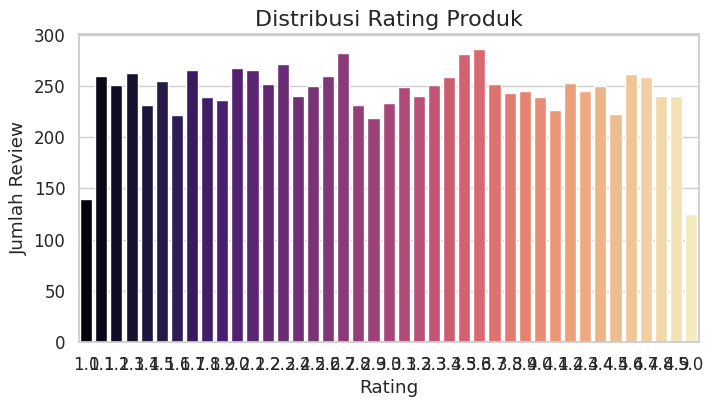

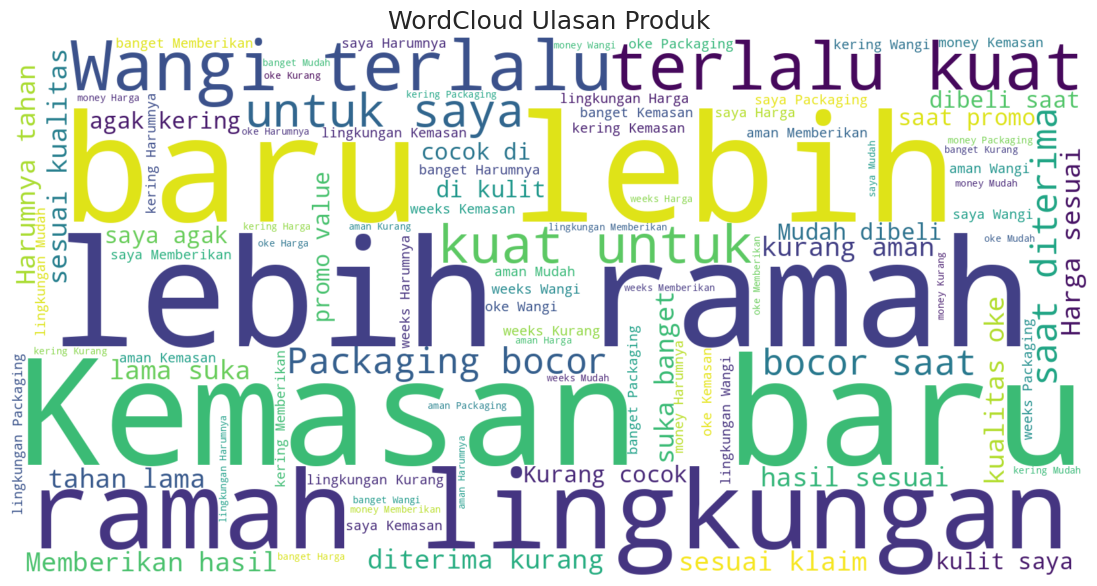

In [ ]:
# Distribusi rating
plt.figure(figsize=(8,4))
sns.countplot(x='rating', data=reviews_df, palette='magma')
plt.title('Distribusi Rating Produk', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Jumlah Review')
plt.show()

# WordCloud dari kolom 'comment'
if 'comment' in reviews_df.columns:
    text = ' '.join(str(t) for t in reviews_df['comment'].dropna())
    if text.strip():
        wc = WordCloud(width=1600, height=800, background_color='white').generate(text)
        plt.figure(figsize=(14,7))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title('WordCloud Ulasan Produk', fontsize=18)
        plt.show()
    else:
        print("Kolom 'comment' kosong.")
else:
    print("Kolom 'comment' gak ditemukan.")
